<a href="https://colab.research.google.com/github/Anastasia-Makarova/DATA_homeworks/blob/main/HW4_OverfittingHomeWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лінійна регресія: перенавчання і регуляризація

У цьому завданні ми на прикладах побачимо, як перенавчаються лінійні моделі, розберемо, чому так відбувається, і з'ясуємо, як діагностувати та контролювати перенавчання.

В усіх комірках, де вказаний коментар з інструкціями, потрібно написати код, який виконує ці інструкції. Решту комірок із кодом (без коментарів) треба просто виконати. Крім того, у завданні необхідно відповідати на запитання; відповіді потрібно вписувати після виділеного слова "__Відповідь:__".

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import drive

In [33]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ми будемо працювати з датасетом __"bikes_rent.csv"__, у якому по днях записані календарна інформація та погодні умови, що характеризують автоматизовані пункти прокату велосипедів, а також кількість прокатів у цей день. Останнє ми будемо передбачати; таким чином, ми будемо розв'язувати завдання регресії.

### Ознайомлення з даними

## Завдання 1

Завантажте датасет за допомогою функції __pandas.read_csv__ у змінну __df__. Виведіть перші 5 рядків, щоб переконатися в коректному зчитуванні даних:

In [34]:
df_load = pd.read_csv('/content/drive/My Drive/DATA homeworks/04/bikes_rent.csv')
df_load.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [35]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Для кожного дня прокату відомі такі ознаки:
* _season_: 1 — весна, 2 — літо, 3 — осінь, 4 — зима
* _yr_: 0 — 2011, 1 — 2012
* _mnth_: від 1 до 12
* _holiday_: 0 — немає свята, 1 — є свято
* _weekday_: від 0 до 6
* _workingday_: 0 — неробочий день, 1 — робочий день
* _weathersit_: оцінка сприятливості погоди від 1 (чистий, ясний день) до 4 (злива, туман)
* _temp_: температура в Цельсіях
* _atemp_: температура за відчуттями в Цельсіях
* _hum_: вологість
* _windspeed(mph)_: швидкість вітру в милях за годину
* _windspeed(ms)_: швидкість вітру в метрах за секунду
* _cnt_: кількість орендованих велосипедів (це цільова ознака, її ми будемо передбачати)

Отже, у нас є речові, бінарні та номінальні (порядкові) ознаки, і з усіма з них можна працювати як з речовими. З номінальними ознаками теж можна працювати як з речовими, тому що на них заданий порядок. Давайте подивимося на графіках, як цільова ознака залежить від решти.

Побудуйте графіки залежностей атрибутів від кількості поїздок. Іншими словами, вам потрібно побудувати 12 графіків. На кожному має бути зображена залежність чергового атрибута від змінної **cnt**.

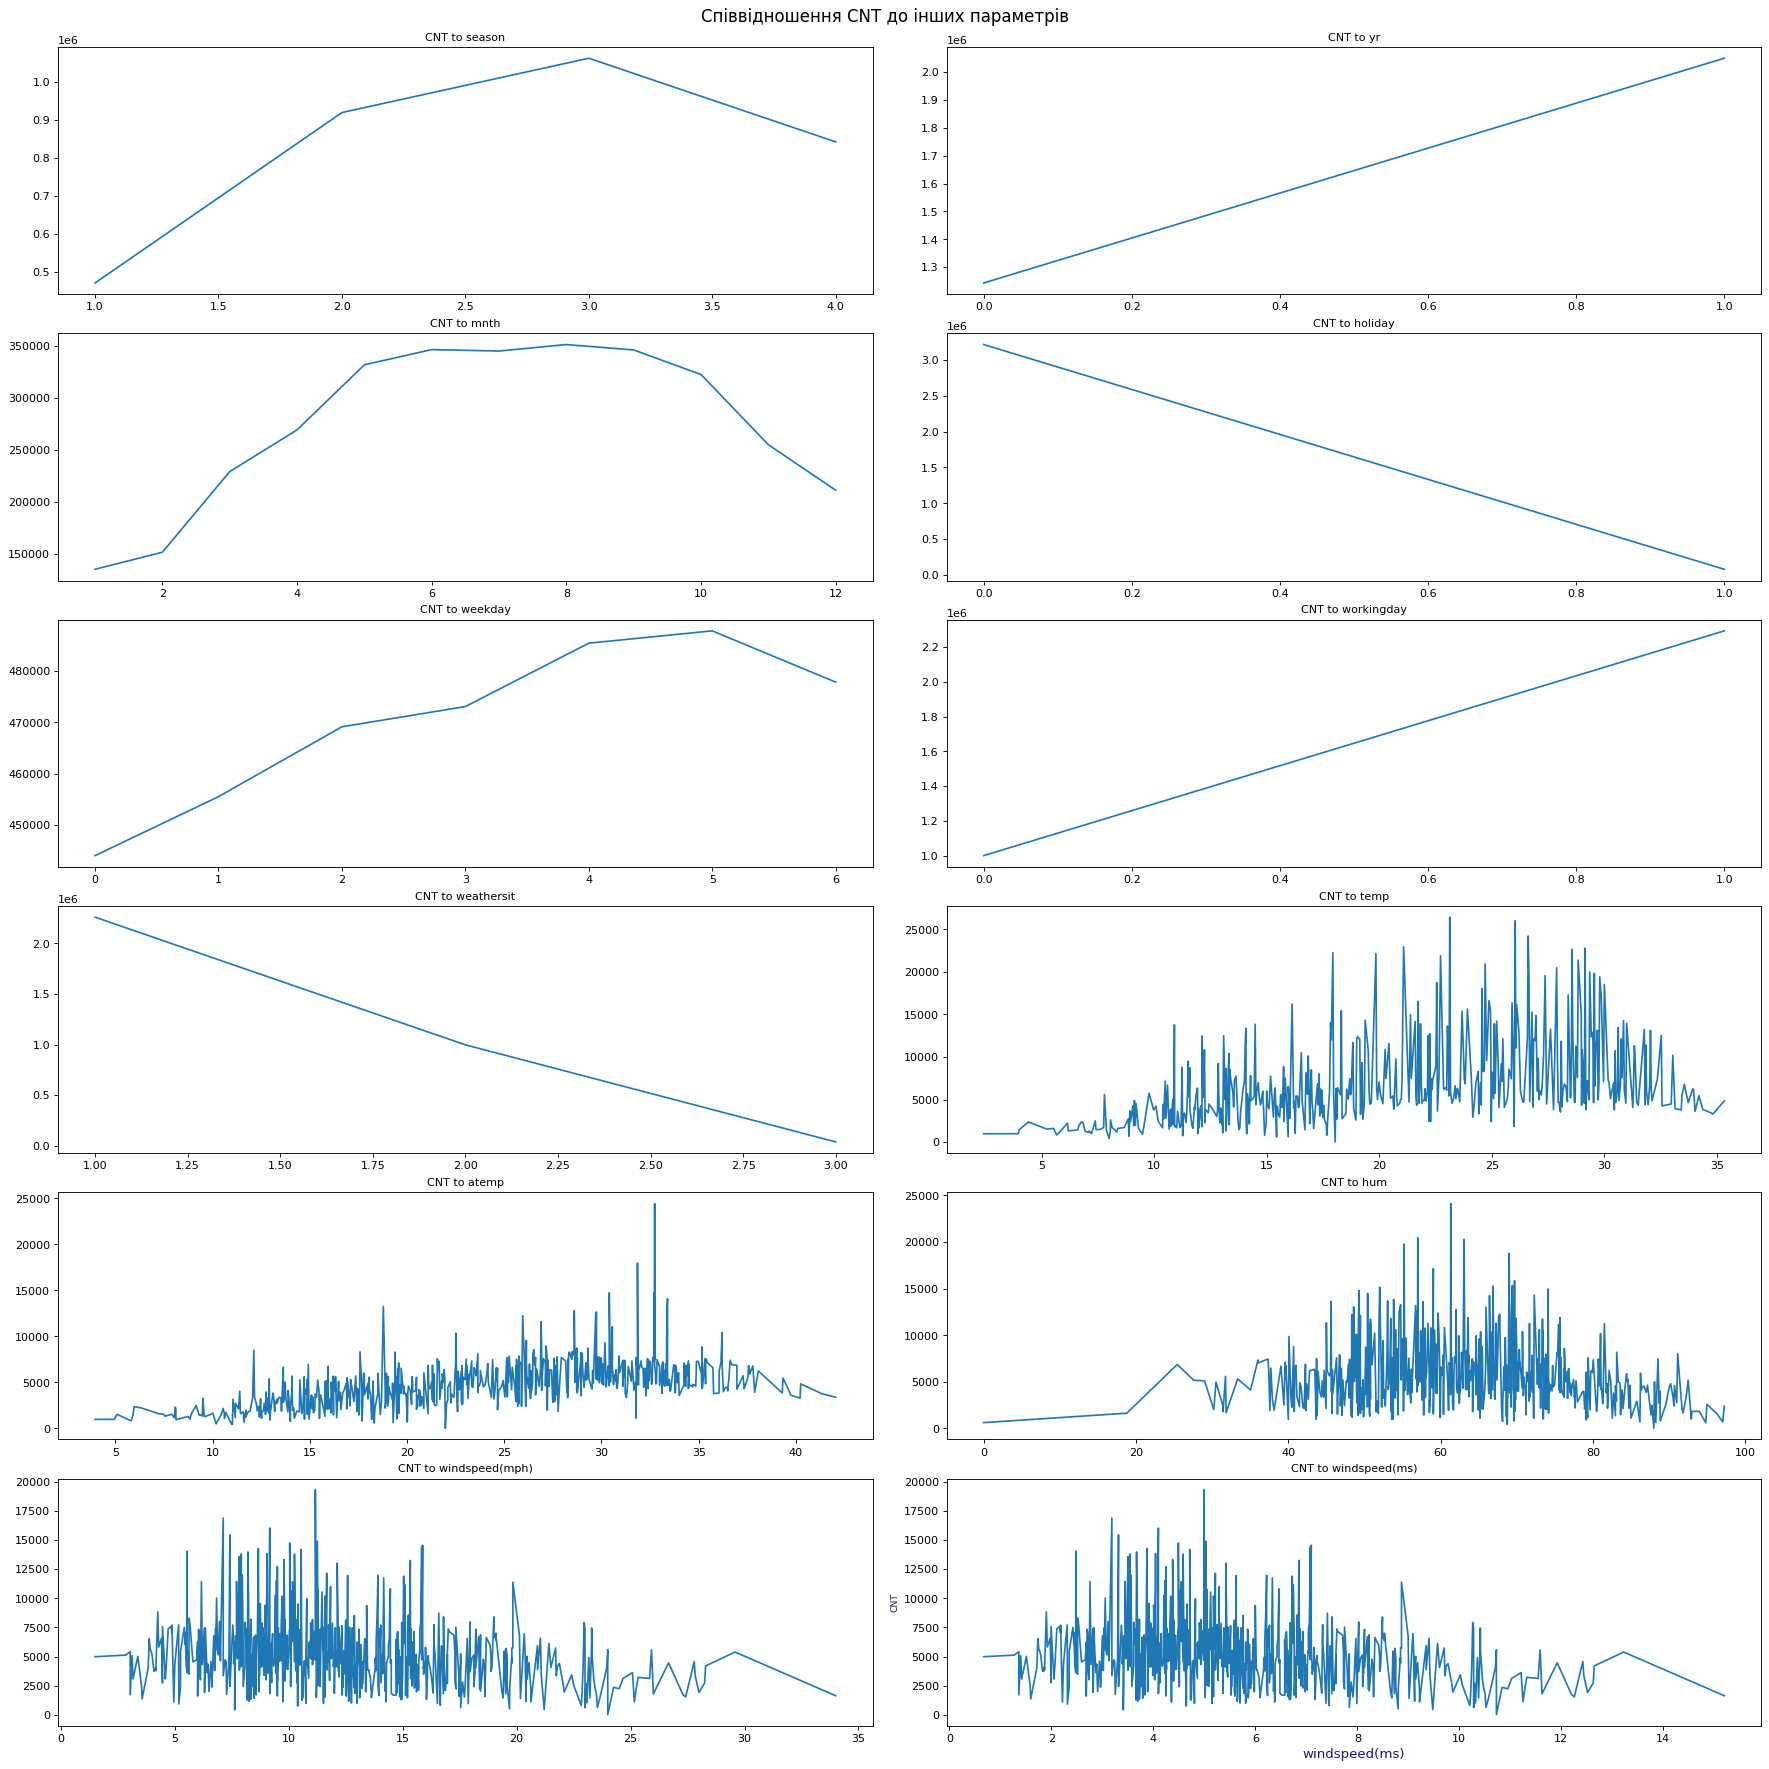

In [36]:
fig, axs = plt.subplots(6, 2, figsize=(22, 22), dpi=80, layout="constrained")

x, y = 0, 0
column_index = 0
columns = df_load.columns.values.tolist()


while x <= 5:
  while y <= 1:

    # axs[x,y].bar(
    axs[x,y].plot(
    # axs[x,y].scatter(
        df_load[columns[column_index]].sort_values().unique(),
        df_load.groupby(columns[column_index]).sum()['cnt'],
        )

    axs[x,y].set_title(
        f'CNT to {columns[column_index]}',
        fontsize=10,
        )

    plt.xlabel(
        f'{columns[column_index]}',
        fontsize="large",
        color="midnightblue",
        )

    plt.ylabel(
        "CNT",
        fontsize="small",
        color="midnightblue",
        )

    column_index +=1

    y += 1
  x += 1
  y = 0

fig.suptitle('Співвідношення CNT до інших параметрів', fontsize=15)

plt.show()

__Запитання:__
1. Яким є характер залежності кількості прокатів від місяця?
1. Вкажіть одну або дві ознаки, від яких кількість прокатів скоріше за все залежить лінійно.

1) лінійна і квадратична

2) weathersit

## Завдання 2

Давайте більш строго оцінимо рівень лінійної залежності між ознаками та цільовою змінною. Гарною мірою лінійної залежності між двома векторами є кореляція Пірсона. Нам уже доводилося мати з нею справу раніше. Для її обчислення в pandas можна використовувати методи датафрейму: corr і corrwith.

Порахуйте кореляції всіх ознак, окрім останньої, з останньою за допомогою методу `corrwith`.

In [37]:
df1 = df_load.drop('cnt', axis=1)
df2 = df_load['cnt']
corr = df1.corrwith(df2)
print('Correlation of parametres to cnt')
corr

Correlation of parametres to cnt


season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

У вибірці є ознаки, що корелюють із цільовою, а отже, завдання можна розв'язувати лінійними методами.

За графіками видно, що деякі ознаки схожі між собою. Тому давайте також порахуємо кореляції між речовими ознаками.

<Axes: >

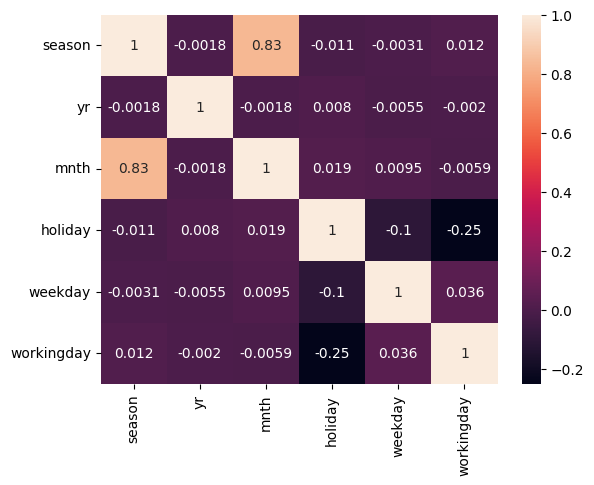

In [38]:
cat_features = [
    'season',
    'yr',
    'mnth',
    'holiday',
    'weekday',
    'workingday'
    ]
features_to_corr = df_load[cat_features]
corr = features_to_corr.corr()
sns.heatmap (corr, annot=True)

## Завдання 3

Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt
за допомогою методу corr:

<Axes: >

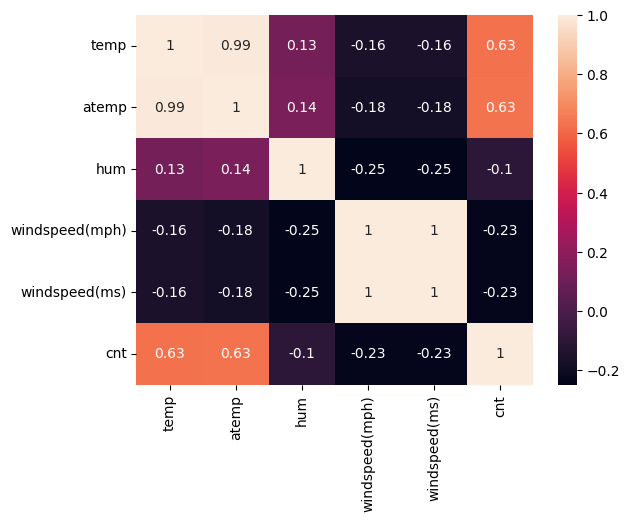

In [39]:
noncat_features = [
    'temp',
    'atemp',
    'hum',
    'windspeed(mph)',
    'windspeed(ms)',
    'cnt'
    ]
features_to_corr = df_load[noncat_features]
corr = features_to_corr.corr()
sns.heatmap (corr, annot=True)

На діагоналях, як і належить, стоять одиниці. Однак у матриці є ще дві пари сильно корелюючих стовпців: temp і atemp (корелюють за своєю природою) і два windspeed (тому що це просто переведення одних одиниць в інші). Далі ми побачимо, що цей факт негативно позначається на навчанні лінійної моделі.

Насамкінець подивимося середні ознак (метод mean), щоб оцінити масштаб ознак і частки 1 у бінарних ознак.

## Завдання 4

Виведіть середні ознак.

In [40]:
df_load.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

Ознаки мають різний масштаб, отже, для подальшої роботи нам краще нормувати матрицю об'єкти-ознаки.

In [41]:
def normalization(data):

  mean = np.mean(data)
  value_range = np.max(data) - np.min(data)
  result = []
  for x in data:
    norm_x = (x-mean) / value_range
    result.append(norm_x)

  return result

In [42]:
columns = df_load.columns.values.tolist()

df_norm = pd.DataFrame()

for column in columns:
  df_norm[column] = normalization(df_load[column])

df_norm

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,-0.49886,-0.500684,-0.501803,-0.028728,0.500456,-0.683995,0.302326,-0.188425,-0.145347,0.182971,-0.061929,-0.061929,-0.404895
1,-0.49886,-0.500684,-0.501803,-0.028728,-0.499544,-0.683995,0.302326,-0.164362,-0.158323,0.070121,0.119679,0.119679,-0.426064
2,-0.49886,-0.500684,-0.501803,-0.028728,-0.332877,0.316005,-0.197674,-0.372595,-0.374034,-0.196011,0.119205,0.119205,-0.363018
3,-0.49886,-0.500684,-0.501803,-0.028728,-0.166211,0.316005,-0.197674,-0.368064,-0.344215,-0.038518,-0.062239,-0.062239,-0.338512
4,-0.49886,-0.500684,-0.501803,-0.028728,0.000456,0.316005,-0.197674,-0.334474,-0.321706,-0.196336,-0.007393,-0.007393,-0.334140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,-0.49886,0.499316,0.498197,-0.028728,0.167123,0.316005,0.302326,-0.300569,-0.325155,0.025731,0.329120,0.329120,-0.275006
727,-0.49886,0.499316,0.498197,-0.028728,0.333789,0.316005,0.302326,-0.301608,-0.287871,-0.038966,-0.072186,-0.072186,-0.162143
728,-0.49886,0.499316,0.498197,-0.028728,0.500456,-0.683995,0.302326,-0.301608,-0.304471,0.128558,-0.136275,-0.136275,-0.363938
729,-0.49886,0.499316,0.498197,-0.028728,-0.499544,-0.683995,-0.197674,-0.298493,-0.318516,-0.148649,0.330400,0.330400,-0.311591


### Проблема перша: колінеарні ознаки

Отже, у наших даних одна ознака дублює іншу, і є ще дві дуже схожі. Звичайно, ми могли б одразу видалити дублікати, але давайте подивимося, як відбувалося б навчання моделі, якби ми не помітили цю проблему.

Для початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо її середнє і поділимо на стандартне відхилення. Це можна зробити за допомогою методу scale.

Крім того, необхідно перемішати вибірку, це буде потрібно для крос-валідації.

In [43]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [44]:
df_shuffled = shuffle(df_load, random_state=42)
X, y = pd.DataFrame(), pd.DataFrame()
for col in df_shuffled.columns[:-1]:
    X[col] = scale(df_shuffled[col])
y['cnt'] = df_shuffled["cnt"]

# original code:
# df_shuffled = shuffle(df, random_state=42)
# X = scale(df_shuffled[df_shuffled.columns[:-1]])
# y = df_shuffled["cnt"]

In [45]:
X

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms)
0,1.354375,0.998633,1.588660,-0.171981,-0.497782,0.679706,-0.726048,-0.106884,-0.032545,0.743727,-0.211211,-0.211211
1,-1.348213,-1.001369,-1.310268,-0.171981,0.500513,0.679706,-0.726048,-1.686082,-1.820550,-1.335389,1.126812,1.126812
2,1.354375,-1.001369,1.008875,-0.171981,0.999661,0.679706,1.110427,-0.899555,-0.955126,-0.295514,0.503491,0.503491
3,-0.447350,0.998633,-0.730482,-0.171981,-1.496077,-1.471225,1.110427,-0.380219,-0.350427,0.339741,-0.235254,-0.235254
4,1.354375,0.998633,0.718982,-0.171981,-0.497782,0.679706,-0.726048,0.298565,0.428770,-0.406755,0.591838,0.591838
...,...,...,...,...,...,...,...,...,...,...,...,...
726,-1.348213,-1.001369,-1.020375,-0.171981,-1.496077,-1.471225,-0.726048,-0.607005,-0.578834,-0.706119,1.034514,1.034514
727,-0.447350,-1.001369,-0.730482,-0.171981,-1.496077,-1.471225,-0.726048,-0.211658,-0.175978,-1.042010,1.459229,1.459229
728,1.354375,-1.001369,0.718982,-0.171981,0.001366,0.679706,1.110427,0.763234,0.619000,1.551700,-0.540478,-0.540478
729,-1.348213,0.998633,-1.020375,-0.171981,-1.496077,-1.471225,-0.726048,-0.730601,-0.704232,-1.060460,0.414499,0.414499


In [46]:
y

,cnt
703,6606
33,1550
300,3747
456,6041
633,7538
...,...
71,2417
106,3744
270,3907
435,4911


Давайте навчимо лінійну регресію на наших даних і подивимося на ваги ознак.

In [47]:
from sklearn.linear_model import LinearRegression

## Завдання 5

Створіть об'єкт лінійного регресора, навчіть його на всіх даних і виведіть ваги моделі (ваги зберігаються у змінній `coef_` класу регресора). Можна виводити пари (назва ознаки, вага), скориставшись функцією `zip`, вбудованою в мову python. Назви ознак зберігаються у змінній `df.columns`.


In [48]:
lr = LinearRegression().fit(X,y)

In [49]:
for w in list(zip(X.columns, lr.coef_[0])):
  print('{:20}{:>10}'.format
   (w[0],
    w[1].round(6))
   )

season              570.863796
yr                  1021.965378
mnth                -141.301745
holiday             -86.759345
weekday             137.225064
workingday           56.391882
weathersit          -330.226462
temp                367.483733
atemp               585.549386
hum                 -145.614306
windspeed(mph)      12457138390688.885
windspeed(ms)       -12457138390887.346


Ми бачимо, що ваги при лінійно-залежних ознаках за модулем значно більші, ніж при інших ознаках. Щоб зрозуміти, чому так сталося, згадаємо аналітичну формулу, за якою обчислюються ваги лінійної моделі в методі найменших квадратів:

$$w = (X^TX)^{-1} X^T y$$

Якщо в $X$ є колінеарні (лінійно-залежні) стовпці, матриця $X^TX$ стає виродженою, і формула перестає бути коректною. Чим більш залежні ознаки, тим менший визначник цієї матриці й тим гірша апроксимація $Xw \approx y$. Таку ситуацію називають _проблемою мультиколінеарності_.

З парою (temp, atemp) трохи менше корелюючих змінних такого не сталося, однак на практиці завжди варто уважно стежити за коефіцієнтами при схожих ознаках.

Для того щоб розв'язати проблему мультиколінеарності, потрібно скористатися регуляризатором. До оптимізуючого функціоналу додають $L_1$ або $L_2$ норму ваг, помножену на коефіцієнт регуляризації $\alpha$. У першому випадку метод називається Lasso, а у другому — Ridge.

### Завдання 6
Давайте спробуємо навчити лінійні моделі з $L_1$ і $L_2$-регуляризацією, а далі порівняємо їхні ваги. Навчіть регресори Ridge і Lasso з параметрами за замовчуванням і переконайтеся, що проблема з вагами вирішилась.

In [50]:
from sklearn.linear_model import Ridge, Lasso

Навчіть лінійну модель з $L_1$-регуляризацією (клас Lasso) і виведіть ваги.

In [51]:
l1_lasso = Lasso().fit(X, y)

In [52]:
l1_lasso.coef_

array([ 5.60241616e+02,  1.01946349e+03, -1.28730627e+02, -8.61527813e+01,
        1.37347894e+02,  5.52123706e+01, -3.32369857e+02,  3.76363236e+02,
        5.76530794e+02, -1.44129155e+02, -1.97139689e+02, -2.80514042e-08])

In [53]:
for w in list(zip(X.columns, l1_lasso.coef_)):
  print('{:15}{:>10}'.format(
      w[0],
      w[1].round(6))
  )

season         560.241616
yr             1019.463494
mnth           -128.730627
holiday        -86.152781
weekday        137.347894
workingday      55.212371
weathersit     -332.369857
temp           376.363236
atemp          576.530794
hum            -144.129155
windspeed(mph) -197.139689
windspeed(ms)        -0.0


Навчіть лінійну модель з $L_2$-регуляризацією (клас Ridge) і виведіть ваги.

In [54]:
l2_ridge = Ridge().fit(X, y)

In [55]:
l2_ridge.coef_

array([[ 563.06457225, 1018.94837879, -131.87332028,  -86.746098  ,
         138.00511118,   55.90311038, -332.3497885 ,  386.45788919,
         566.34704706, -145.0713273 ,  -99.25944108,  -99.25944115]])

In [56]:
print("{:<20}{:>20}{:>20}{:>20}".format(
    'Feature',
    'LR',
    'L1 Lasso',
    'L2 Ridge'
    )
)

for w in list(
    zip(
        X.columns,
        lr.coef_[0],
        l1_lasso.coef_,
        l2_ridge.coef_[0]
        )
    ):

  print ("{:<20}{:>20}{:>20}{:>20}".format(
      w[0],
      w[1].round(6),
      w[2].round(6),
      w[3].round(6)
      )
  )

Feature                               LR            L1 Lasso            L2 Ridge
season                        570.863796          560.241616          563.064572
yr                           1021.965378         1019.463494         1018.948379
mnth                         -141.301745         -128.730627          -131.87332
holiday                       -86.759345          -86.152781          -86.746098
weekday                       137.225064          137.347894          138.005111
workingday                     56.391882           55.212371            55.90311
weathersit                   -330.226462         -332.369857         -332.349788
temp                          367.483733          376.363236          386.457889
atemp                         585.549386          576.530794          566.347047
hum                          -145.614306         -144.129155         -145.071327
windspeed(mph)        12457138390688.885         -197.139689          -99.259441
windspeed(ms)        -124571

### Завдання 7

На відміну від $L_2$-регуляризації, $L_1$ обнуляє ваги при деяких ознаках. Давайте поспостерігаємо, як змінюються ваги зі збільшенням коефіцієнта регуляризації $\alpha$.

Для кожного значення коефіцієнта з `alphas` навчіть регресор `Lasso` і запишіть ваги у список `coefs_lasso`, а потім навчіть `Ridge` і запишіть ваги у список`coefs_ridge`. Конвертуйте отримані списки в `np.array`.

In [57]:
# alphas = np.arange(1, 500, 50)

# coefs_lasso = pd.DataFrame(Lasso(alpha=alpha).fit(X, y).coef_ for alpha in alphas)

# coefs_ridge = pd.DataFrame(Ridge(alpha=alpha).fit(X, y).coef_ for alpha in alphas)


# coefs_lasso

# # '''Чому помилка??'''

In [58]:
alphas = np.arange(1, 500, 50)

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    coefs_lasso.append(Lasso(alpha=alpha).fit(X, y).coef_)
    coefs_ridge.append(Ridge(alpha=alpha).fit(X, y).coef_[0])

coefs_lasso = np.asarray(coefs_lasso)
coefs_ridge = np.asarray(coefs_ridge)


In [59]:
pd.DataFrame(coefs_lasso, columns=X.columns.values.tolist())

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms)
0,560.241616,1019.463494,-128.730627,-86.152781,137.347894,55.212371,-332.369857,376.363236,576.530794,-144.129155,-197.139689,-2.805140e-08
1,410.969632,977.019409,-0.000000,-53.448969,91.943437,17.537212,-318.125568,322.829934,610.031512,-91.068962,-145.066095,-2.298929e-08
2,370.077089,935.945490,0.000000,-12.161936,48.888634,0.000000,-308.805664,269.417263,632.502623,-27.504288,-93.774904,-2.416579e-08
3,332.835717,891.870058,0.000000,-0.000000,0.000000,0.000000,-279.616688,211.052030,662.920880,-0.000000,-50.155147,-2.627899e-08
4,298.134448,845.652857,0.000000,-0.000000,0.000000,0.000000,-235.571345,124.144807,725.379483,-0.000000,-12.646177,-2.787757e-08
5,258.927201,799.237273,0.000000,-0.000000,0.000000,0.000000,-190.821549,72.075938,750.363107,-0.000000,-0.000000,-0.000000e+00
6,217.427513,752.720808,0.000000,-0.000000,0.000000,0.000000,-145.713398,37.715365,756.296866,-0.000000,-0.000000,-0.000000e+00
7,175.929845,706.203788,0.000000,-0.000000,0.000000,0.000000,-100.605389,3.660938,761.926337,-0.000000,-0.000000,-0.000000e+00
8,134.628497,659.632535,0.000000,-0.000000,0.000000,0.000000,-55.511063,0.000000,737.348061,-0.000000,-0.000000,-0.000000e+00
9,93.351742,613.054639,0.000000,-0.000000,0.000000,0.000000,-10.418569,0.000000,709.130877,-0.000000,-0.000000,-0.000000e+00


In [60]:
pd.DataFrame(coefs_ridge, columns=X.columns.values.tolist())

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms)
0,563.064572,1018.948379,-131.873320,-86.746098,138.005111,55.903110,-332.349788,386.457889,566.347047,-145.071327,-99.259441,-99.259441
1,461.178632,954.307742,-41.565450,-84.913470,126.603667,54.251691,-313.275151,458.901477,481.443500,-151.291010,-101.627315,-101.627315
2,403.976530,898.083622,5.674243,-81.911062,117.941411,52.728484,-298.408981,455.289868,467.431417,-152.686051,-102.101671,-102.101671
3,366.604239,848.463465,34.027283,-78.771965,110.680120,51.257192,-286.125159,447.479825,455.754030,-151.483206,-102.005376,-102.005376
4,339.745290,804.251048,52.489873,-75.717408,104.403464,49.841895,-275.486095,438.509689,444.764274,-148.943970,-101.586385,-101.586385
5,319.158641,764.561434,65.152007,-72.819708,98.878804,48.484525,-266.002556,429.214123,434.235235,-145.698115,-100.964711,-100.964711
6,302.636060,728.708540,74.138281,-70.098983,93.955811,47.185338,-257.390629,419.926152,424.121922,-142.089345,-100.208620,-100.208620
7,288.913276,696.145816,80.660457,-67.554852,89.528675,45.943467,-249.471395,410.800184,414.409373,-138.316538,-99.360661,-99.360661
8,277.213216,666.429747,85.459254,-65.178706,85.518667,44.757303,-242.124399,401.911945,405.085853,-134.499038,-98.449064,-98.449064
9,267.031090,639.195368,89.012323,-62.958906,81.864909,43.624770,-235.263997,393.297986,396.138155,-130.709872,-97.493434,-97.493434


Проаналізуйте динаміку ваг при збільшенні параметра регуляризації:

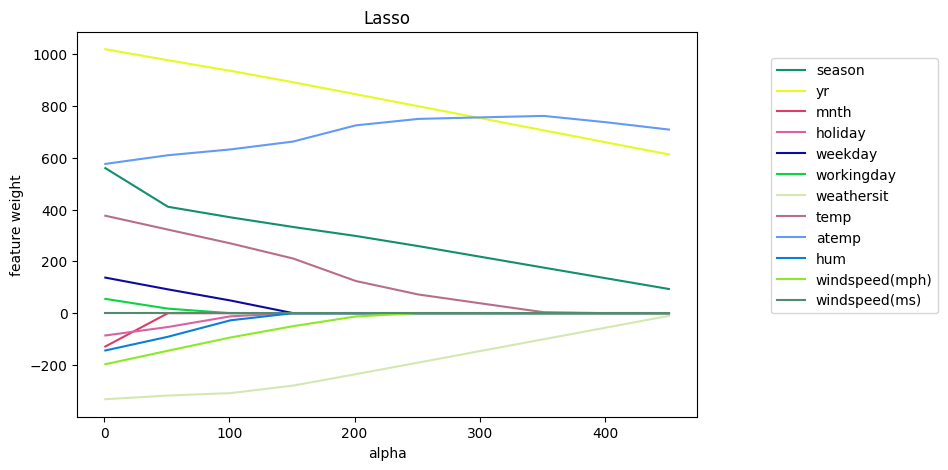

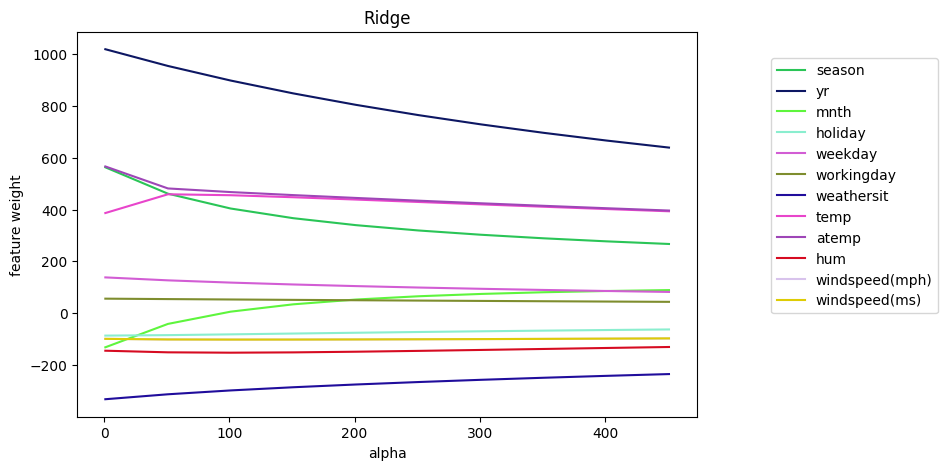

In [61]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df_shuffled.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df_load.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Проаналізуйте графіки та дайте відповіді на такі запитання.

1. Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при одному й тому самому alpha?
1. Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть, чому так відбувається.
1. Чи можна стверджувати, що `Lasso` виключає одну з ознак `windspeed` при будь-якому значенні `alpha > 0`? А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт при ньому менший $10^{-3}$.
1. Який із регуляризаторів підійде для відбору неінформативних ознак?

1. Lasso!
2. Стрімляться до 0, оскільки чим більше гіперпараметр лямбда, тим більше модель штрафується за клікість і розмір коефіцієентів
3. так, на відміну від Ridge
4. Lasso

### Завдання 8

Далі будемо працювати з `Lasso`.

Отже, ми бачимо, що при зміні alpha модель по-різному підбирає коефіцієнти ознак. Нам потрібно вибрати найкраще alpha.

Для цього, по-перше, нам потрібна метрика якості. Будемо використовувати як метрику сам оптимізований функціонал методу найменших квадратів, тобто `Mean Square Error`.

По-друге, потрібно зрозуміти, на яких даних цю метрику рахувати. Не можна вибирати `alpha` за значенням MSE на навчальній вибірці, тому що тоді ми не зможемо оцінити, як модель буде робити передбачення на нових для неї даних. Якщо ми виберемо одне розбиття вибірки на навчальну та тестову (це називається holdout), то налаштуємося на конкретні "нові" дані, і знову можемо перенавчитися. Тому будемо робити декілька розбиттів вибірки, на кожному пробувати різні значення alpha, а потім усереднювати MSE. Найзручніше робити такі розбиття крос-валідацією, тобто розділити вибірку на $K$ частин, і кожного разу брати одну з них як тестову, а з блоків, що залишилися, складати навчальну вибірку.

Робити крос-валідацію для регресії в sklearn зовсім просто: для цього є спеціальний регресор, __LassoCV__, який бере на вхід список із alpha і для кожного з них обчислює MSE на крос-валідації. Після навчання (якщо залишити параметр cv=3 за замовчуванням) регресор буде містити змінну __mse\_path\___, матрицю розміру len(alpha) x k, k = 3 (число блоків у крос-валідації), що містить значення MSE на тесті для відповідних запусків. Крім того, у змінній alpha\_ буде зберігатися вибране значення параметра регуляризації, а в coef\_, традиційно, навчені ваги, що відповідають цьому alpha_.

Зверніть увагу, що регресор може змінювати порядок, у якому він проходить по alphas; для зіставлення з матрицею MSE краще використовувати змінну регресора alphas_.

Навчіть регресор `LassoCV` на всіх параметрах регуляризації з alpha. Побудуйте графік _усередненого_ за рядками `MSE` в залежності від `alpha` (використовуйте для цього функцію `create_plot`).

Виведіть вибране `alpha`, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.

In [62]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = list(map(lambda e: e[0], data))
    y = list(map(lambda e: e[1], data))
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

In [63]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)

regressor = LassoCV(alphas=alphas, cv=3).fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
regressor.mse_path_

array([[830768.68693702, 919721.93589263, 805481.54522903],
       [822965.9041311 , 911867.54470864, 804343.02766964],
       [815129.08593972, 903855.55058088, 803483.74706927],
       [807667.98224742, 896148.95236924, 802906.09265381],
       [800137.23263318, 888747.72399201, 801974.9311743 ],
       [793005.6616591 , 881651.8631318 , 800937.92121214],
       [786275.36724172, 874861.36810104, 799342.37031522],
       [779946.35004807, 868376.23749144, 798151.12777192],
       [774018.6100807 , 862196.47012638, 797363.63293845],
       [768492.14733962, 856322.06502308, 796979.89551936],
       [763366.96182482, 850359.8722302 , 796999.92588656],
       [758643.05353631, 844566.95589129, 797423.73295863],
       [754320.42247408, 839080.96310802, 798251.32439694],
       [750399.06863813, 833901.906581  , 799482.70678255],
       [746878.99046623, 829029.79332371, 801117.80350671],
       [742255.05212855, 824464.62917087, 801674.30830821],
       [738465.37393446, 819052.82694159

In [65]:
np.mean(regressor.mse_path_, axis=1)

array([851990.72268622, 846392.15883646, 840822.79452996, 835574.34242349,
       830286.6292665 , 825198.48200101, 820159.70188599, 815491.23843715,
       811192.90438185, 807264.70262735, 803575.5866472 , 800211.24746207,
       797217.56999301, 794594.56066723, 792342.19576555, 789464.66320254,
       786750.84083864, 783634.3772912 , 781531.09081992, 785055.14678702])

In [66]:
print (f'Alpha = {regressor.alpha_}')

Alpha = 6


In [67]:
for w in list(zip(X.columns, regressor.coef_)):
  print('{:20}{:>10}'.format(
      w[0],
      w[1].round(6))
  )

season              532.018983
yr                  1015.060223
mnth                -100.039526
holiday              -83.29396
weekday             132.504465
workingday           51.557086
weathersit          -330.559857
temp                370.679855
atemp               581.396931
hum                 -140.007406
windspeed(mph)      -191.771408
windspeed(ms)             -0.0


In [68]:
regressor.alphas_

array([96, 91, 86, 81, 76, 71, 66, 61, 56, 51, 46, 41, 36, 31, 26, 21, 16,
       11,  6,  1])

In [69]:
avg_mse = np.mean(regressor.mse_path_, axis=1)
avg_mse

array([851990.72268622, 846392.15883646, 840822.79452996, 835574.34242349,
       830286.6292665 , 825198.48200101, 820159.70188599, 815491.23843715,
       811192.90438185, 807264.70262735, 803575.5866472 , 800211.24746207,
       797217.56999301, 794594.56066723, 792342.19576555, 789464.66320254,
       786750.84083864, 783634.3772912 , 781531.09081992, 785055.14678702])

In [70]:


data = np.array(list(zip(regressor.alphas_, avg_mse)))

data

array([[9.60000000e+01, 8.51990723e+05],
       [9.10000000e+01, 8.46392159e+05],
       [8.60000000e+01, 8.40822795e+05],
       [8.10000000e+01, 8.35574342e+05],
       [7.60000000e+01, 8.30286629e+05],
       [7.10000000e+01, 8.25198482e+05],
       [6.60000000e+01, 8.20159702e+05],
       [6.10000000e+01, 8.15491238e+05],
       [5.60000000e+01, 8.11192904e+05],
       [5.10000000e+01, 8.07264703e+05],
       [4.60000000e+01, 8.03575587e+05],
       [4.10000000e+01, 8.00211247e+05],
       [3.60000000e+01, 7.97217570e+05],
       [3.10000000e+01, 7.94594561e+05],
       [2.60000000e+01, 7.92342196e+05],
       [2.10000000e+01, 7.89464663e+05],
       [1.60000000e+01, 7.86750841e+05],
       [1.10000000e+01, 7.83634377e+05],
       [6.00000000e+00, 7.81531091e+05],
       [1.00000000e+00, 7.85055147e+05]])

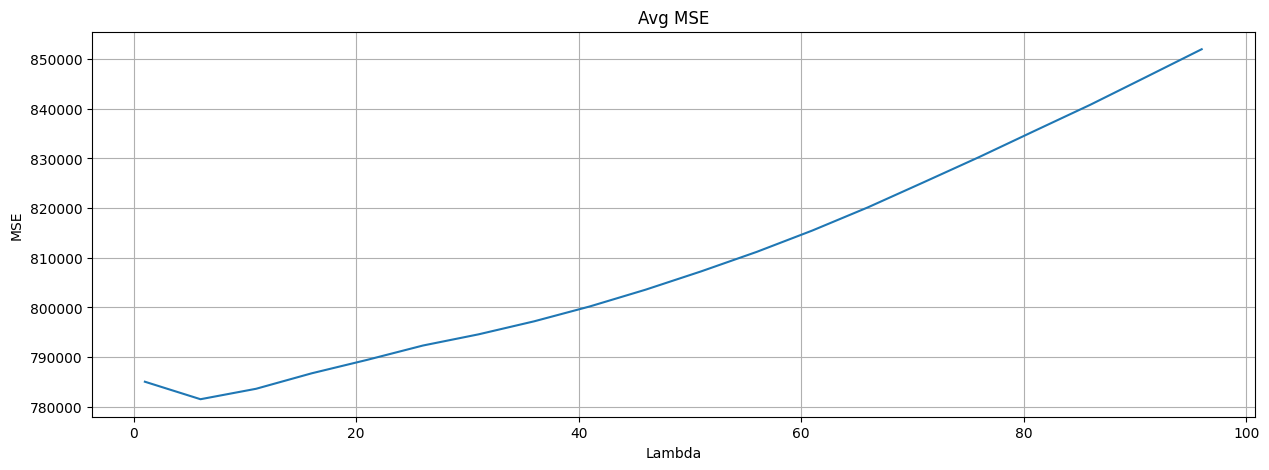

In [71]:
create_plot(data = data, title='Avg MSE', xlabel='Lambda', ylabel='MSE')

Отже, ми вибрали певний параметр регуляризації. Давайте подивимося, які б ми вибирали alpha, якби ділили вибірку лише один раз на навчальну та тестову, тобто розглянемо траєкторії MSE, що відповідають окремим блокам вибірки.

### Завдання 9

Виведіть значення `alpha`, що відповідають мінімумам `MSE` на кожному розбитті (тобто за стовпцями).
На трьох окремих графіках візуалізуйте стовпці `mse_path_`.


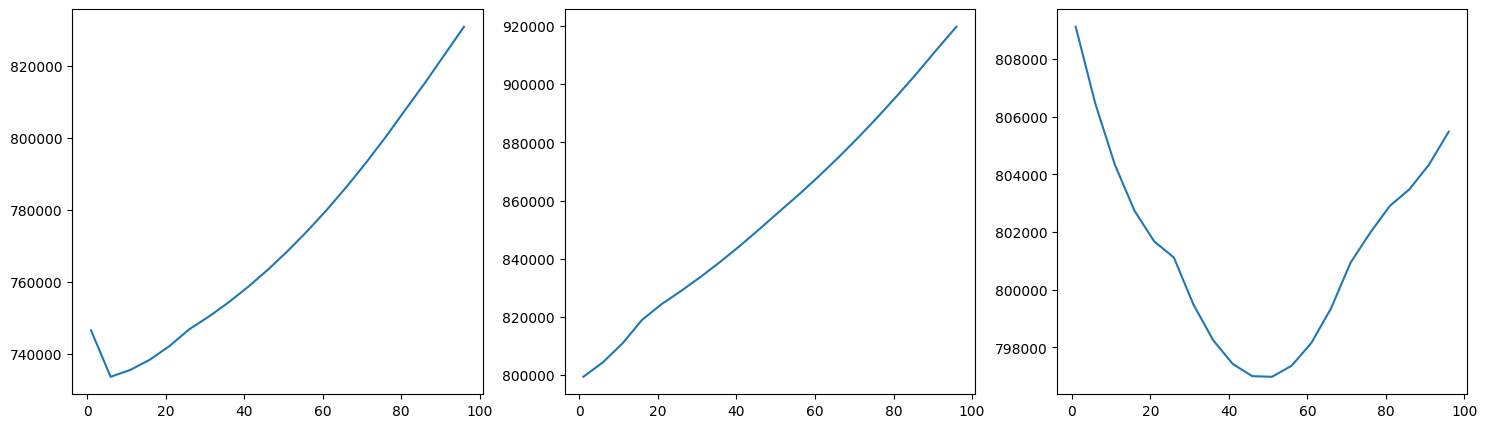

In [72]:
fig, ax = plt.subplots(1, 3, figsize = (18, 5))

ax[0].plot(regressor.alphas_, regressor.mse_path_[:, 0])
ax[1].plot(regressor.alphas_, regressor.mse_path_[:, 1])
ax[2].plot(regressor.alphas_, regressor.mse_path_[:, 2])

На кожному розбитті оптимальне значення `alpha` своє, і йому відповідає велике MSE на інших розбиттях. Виходить, що ми налаштовуємося на конкретні навчальні та контрольні вибірки. При виборі `alpha` на крос-валідації ми вибираємо дещо "середнє", що даватиме прийнятне значення метрики на різних розбиттях вибірки.

### Завдання 10

Нарешті, як прийнято в аналізі даних, давайте проінтерпретуємо результат. Дайте відповіді на наступні запитання.

In [90]:
weights.sort_values(by='Weight', ascending=False)

,Feature,Weight
1,yr,1015.060223
8,atemp,581.396931
0,season,532.018983
7,temp,370.679855
4,weekday,132.504465
5,workingday,51.557086
11,windspeed(ms),-0.000000
3,holiday,-83.293960
2,mnth,-100.039526
9,hum,-140.007406


#### Запитання 1

В останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), подивіться на візуалізації залежностей `cnt` від цих ознак, які ми зображали у блоці "Ознайомлення з даними". Чи видно зростаючу лінійну залежність `cnt` від цих ознак за графіками? Чи логічно стверджувати (виходячи зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди?

In [85]:
weights = pd.DataFrame(
    list(zip(X.columns, regressor.coef_.round(6))),
    columns = ['Feature', 'Weight']
    )


In [86]:
firsts = weights.sort_values(by='Weight', ascending=False).head(4)
firsts

,Feature,Weight
1,yr,1015.060223
8,atemp,581.396931
0,season,532.018983
7,temp,370.679855


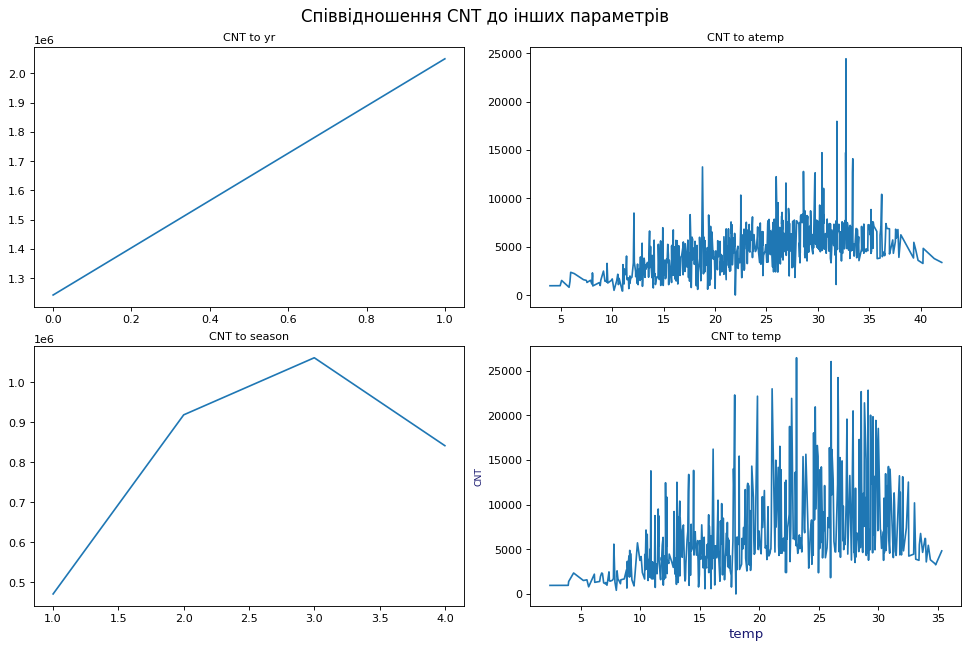

In [87]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=80, layout="constrained")

x, y = 0, 0
column_index = 0
columns = firsts['Feature'].tolist()


while x <= 1:
  while y <= 1:

    # axs[x,y].bar(
    axs[x,y].plot(
    # axs[x,y].scatter(
        df_load[columns[column_index]].sort_values().unique(),
        df_load.groupby(columns[column_index]).sum()['cnt'],
        )

    axs[x,y].set_title(
        f'CNT to {columns[column_index]}',
        fontsize=10,
        )

    plt.xlabel(
        f'{columns[column_index]}',
        fontsize="large",
        color="midnightblue",
        )

    plt.ylabel(
        "CNT",
        fontsize="small",
        color="midnightblue",
        )

    column_index +=1

    y += 1
  x += 1
  y = 0

fig.suptitle('Співвідношення CNT до інших параметрів', fontsize=15)

plt.show()

__Відповідь:__

Безпосередньо лінійна залежність з обраних фіч відстежується від yr, але швидше за все, це обумовлено лише бінарністю фічі в наявних даних. Ця залежність є единою з обраних, логичність якою в подальшому периоді викликає сумніви.

В інших випадках, залежність від кожної фічі, безумовно, відстежується, але  швидше є квадратичною, ніж безпосередньо лінійною.

#### Запитання 2

Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться на відповідні візуалізації. Чи видно лінійну залежність, що зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди?

In [97]:
lasts = weights.sort_values(by='Weight', ascending=True).head(3)
lasts

,Feature,Weight
6,weathersit,-330.559857
10,windspeed(mph),-191.771408
9,hum,-140.007406


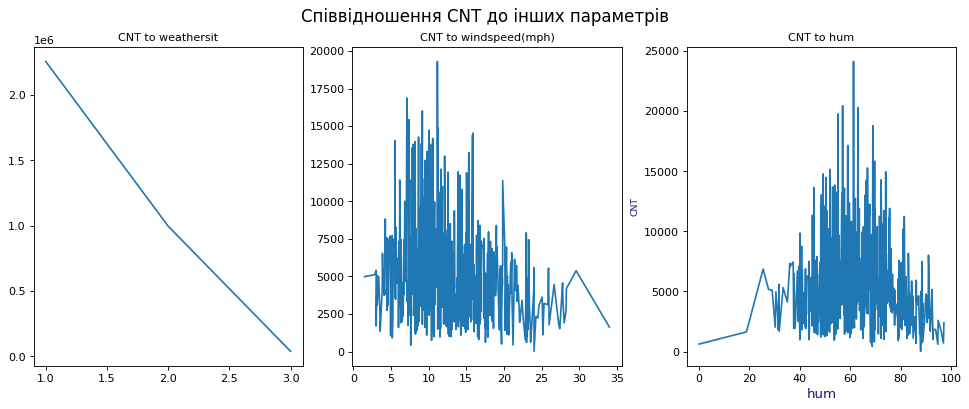

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), dpi=80, layout="constrained")

x = 0
column_index = 0
columns = lasts['Feature'].tolist()


while x <= 2:

    # axs[x].bar(
    axs[x].plot(
    # axs[x].scatter(
        df_load[columns[column_index]].sort_values().unique(),
        df_load.groupby(columns[column_index]).sum()['cnt'],
        )

    axs[x].set_title(
        f'CNT to {columns[column_index]}',
        fontsize=10,
        )

    plt.xlabel(
        f'{columns[column_index]}',
        fontsize="large",
        color="midnightblue",
        )

    plt.ylabel(
        "CNT",
        fontsize="small",
        color="midnightblue",
        )

    column_index +=1
    x += 1


fig.suptitle('Співвідношення CNT до інших параметрів', fontsize=15)

plt.show()

__Відповідь:__

Безпосередня лінійна залежність є від фічі weathersit, в інших випадках залежність  ближче до квадратичної. Але в цілому твердження, що збільшення значення кожної з фіч веде до зменшення кількості велосипедів, взятих на прокаи,  є логічним

#### Запитання 3

Випишіть ознаки з коефіцієнтами, близькими до нуля (< 1e-3). Як ви думаєте, чому модель виключила їх із моделі (знову подивіться на графіки)? Чи правда, що вони ніяк не впливають на попит на велосипеди?

In [81]:
zeroes = weights[(weights['Weight'] > -1) & (weights['Weight'] < 1)]
zeroes

,Feature,Weight
11,windspeed(ms),-0.0


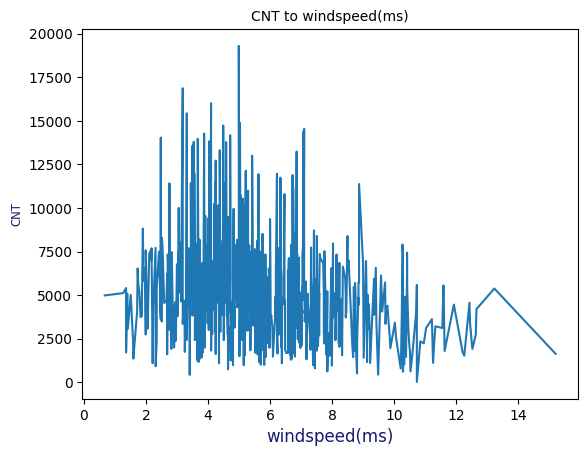

In [82]:
# plt.bar(
plt.plot(
# plt.scatter(
    df_load['windspeed(ms)'].sort_values().unique(),
    df_load.groupby('windspeed(ms)').sum()['cnt'],
    )

plt.title(
    'CNT to windspeed(ms)',
    fontsize=10,
    )

plt.xlabel(
    'windspeed(ms)',
    fontsize="large",
    color="midnightblue",
    )

plt.ylabel(
    "CNT",
    fontsize="small",
    color="midnightblue",
    )

fig.suptitle(f'Співвідношення CNT до windspeed(ms)', fontsize=15)

plt.show()

__Відповідь:__

Єдиний виключений коефіціент -0 windspeed(ms). Згідно з кореляційних дослідженнь, він є повним дублікатом іншої фічі (windspeed(ms)), тому вона не додає нічого нового в модель

### Висновок
Отже, ми подивилися, як можна стежити за адекватністю лінійної моделі, як відбирати ознаки і як грамотно, за можливості не налаштовуючись на якусь конкретну порцію даних, підбирати коефіцієнт регуляризації.

Варто зазначити, що за допомогою крос-валідації зручно підбирати лише невелику кількість параметрів. (1, 2, максимум 3), тому що для кожної допустимої їх комбінації нам доводиться декілька разів навчати модель. Такий процес займає багато часу, особливо якщо треба навчатися на великих обсягах даних.